In [1]:
# ------------- data analysis and wrangling-------------------
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
import shap
# ------------------------------------------------------------

# ------- import các tool visualization ----------------------
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ------------------------------------------------------------

In [2]:
eda = pd.read_csv(r"C:\PYTHON LEARNING\DATA\eye tracking 24000.csv")
eda = pd.DataFrame(eda)

## Lọc ra các dữ liệu đã xem trực tiếp

In [4]:
eda_da_xem = eda[(eda['Already Watched']==True)]
eda_da_xem

,Created,Recording URL,Publicly Shared,Already Watched,Favorited,Tags,Notes,Landing Page URL,Exit Page URL,Referrer URL,...,Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Hotjar User ID,New / Returning,Country,Device,Browser,Operating System
0,2020-09-30T03:32:38,https://insights.hotjar.com/r?site=1982311&rec...,False,True,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online,https://www.google.com.vn/,...,False,False,NaN,NaN,6dc81011,NaN,VN,Phone,Chrome,Ios
1,2020-09-28T04:16:29,https://insights.hotjar.com/r?site=1982311&rec...,False,True,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,NaN,...,False,False,NaN,NaN,e78e0083,NaN,VN,Phone,Samsung,Android
2,2020-09-26T03:14:25,https://insights.hotjar.com/r?site=1982311&rec...,False,True,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,...,False,False,NaN,NaN,89296965,NaN,VN,Phone,Chrome,Android
3,2020-09-30T03:11:46,https://insights.hotjar.com/r?site=1982311&rec...,False,True,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,...,False,False,NaN,NaN,89aaa8ad,NaN,VN,Phone,Chrome,Android
4,2020-09-28T08:36:34,https://insights.hotjar.com/r?site=1982311&rec...,False,True,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,...,False,False,NaN,NaN,3514a32f,NaN,VN,Desktop,Firefox,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20038,2021-04-26T15:00:57,https://insights.hotjar.com/r?site=1982311&rec...,False,True,True,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online,https://invest.vcsc.com.vn/mo-tai-khoan-online,https://www.vcsc.com.vn/,...,False,False,NaN,NaN,366b224d,Returning user,VN,Phone,Chrome,Android
20039,2021-04-26T07:19:12,https://insights.hotjar.com/r?site=1982311&rec...,False,True,True,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,NaN,...,False,False,NaN,NaN,3f99564b,New user,VN,Phone,Coc,Android
20040,2021-04-26T11:56:17,https://insights.hotjar.com/r?site=1982311&rec...,False,True,True,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online,https://invest.vcsc.com.vn/mo-tai-khoan-online,https://www.vcsc.com.vn/,...,False,False,NaN,NaN,f0cf5f93,Returning user,VN,Desktop,Chrome,Windows
20864,2021-05-05T12:11:05,https://insights.hotjar.com/r?site=1982311&rec...,False,True,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,NaN,...,False,False,NaN,NaN,4fdba204,New user,VN,Phone,Coc,Android


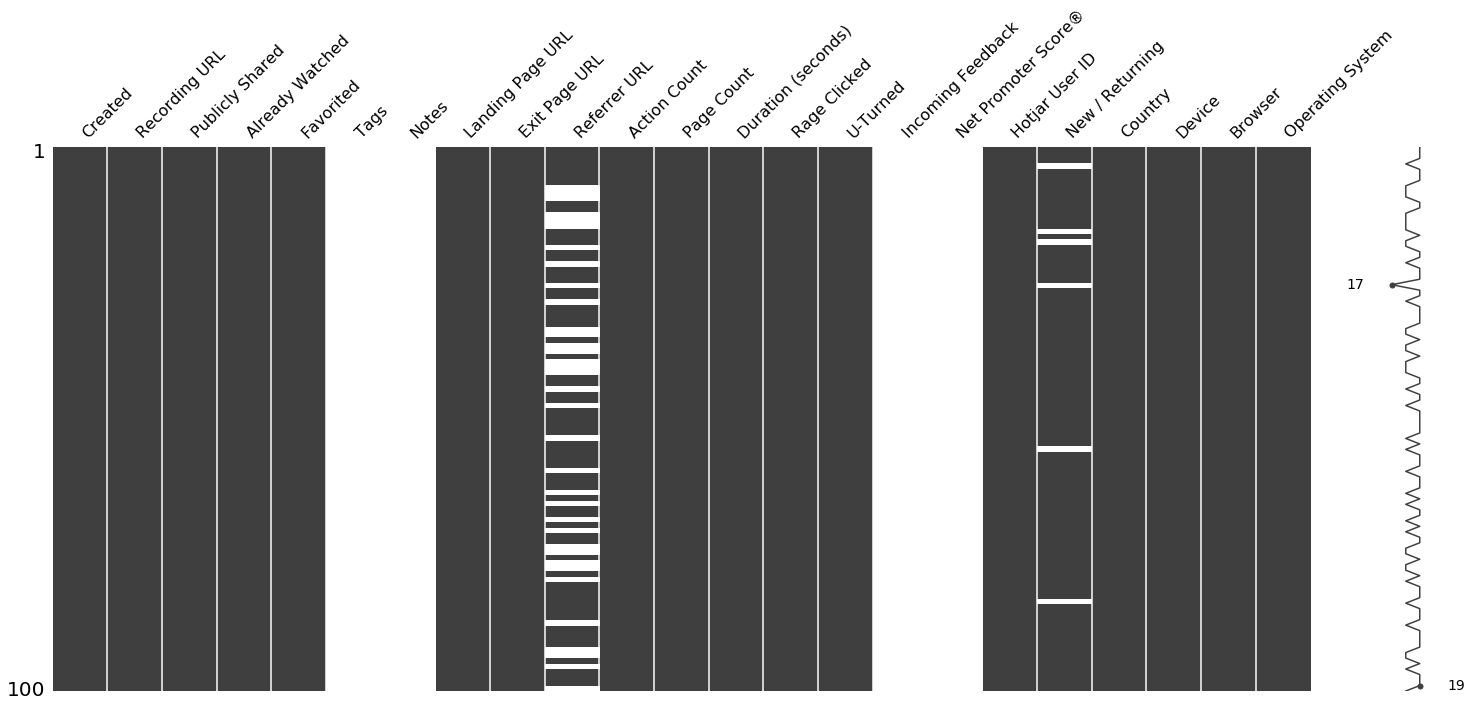

In [5]:
def timnan(eda_da_xem):
    import missingno as msno
    import numpy as np
    collisions = eda_da_xem.replace("nan", np.nan)
    msno.matrix(collisions.sample(100))
    plt.show()
timnan(eda_da_xem)

## Loại bỏ các `Feature` không cần thiết
1. 'Recording URL': url record của hotjar,
2. 'Publicly Shared': dữ liệu social share (trống),
3. 'Already Watched': đã xem hay chưa (100% dã xem ở dataframe này),
4. 'Tags':tag của người xem (dữ liệu trống),
5. 'Notes': noted của người xem, dữ liệu trống,
6. 'Landing Page URL':nguồn dẫn gốc, có feature Landing Page URL chi tiết hơn,
7. 'Incoming Feedback':khách hàng feedback (data này trống),
8. 'Net Promoter Score®':chỉ số đánh giá mức độ hài lòng của khách hàng (data này trống),
9. 'Hotjar User ID':ID người dùng do hotjar tạo


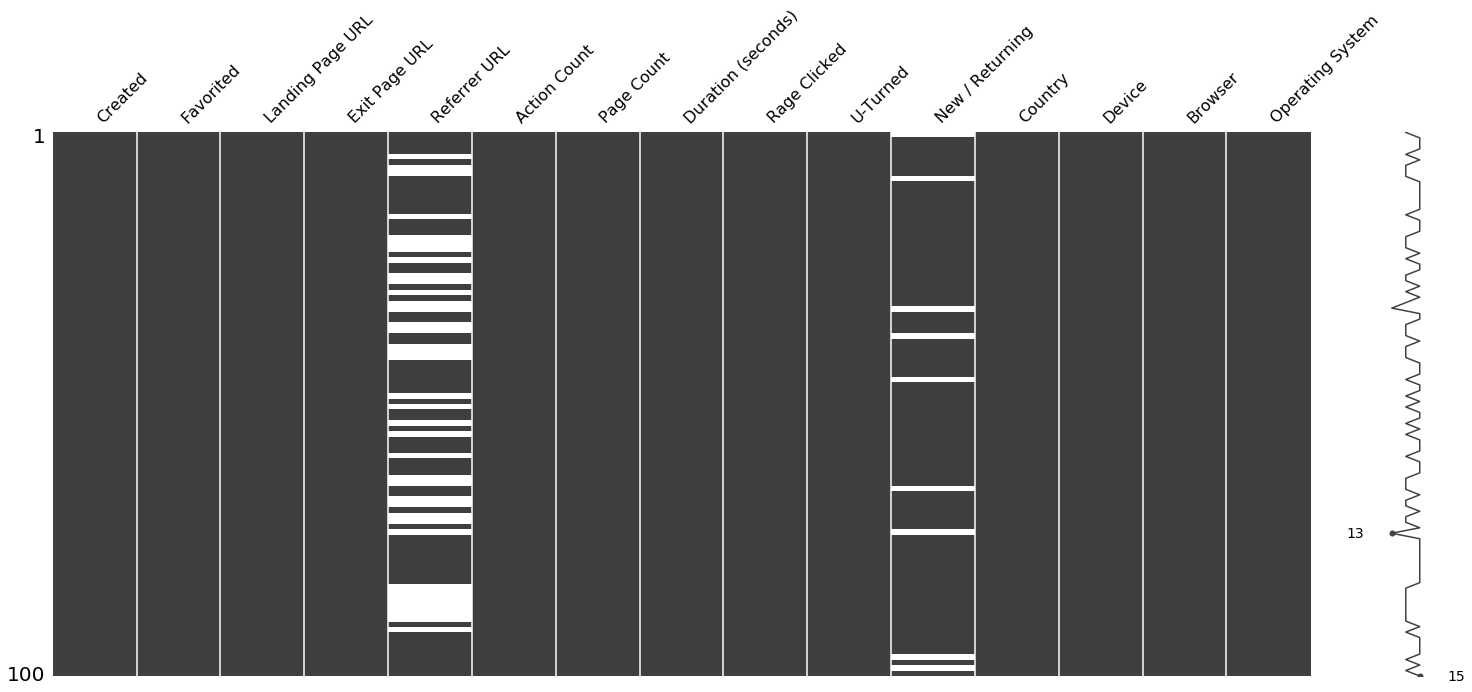

In [6]:
eda_da_xem = eda_da_xem.drop(['Recording URL','Publicly Shared','Already Watched','Tags','Notes','Incoming Feedback','Net Promoter Score®','Hotjar User ID'],axis = 1)
timnan(eda_da_xem)

## Chuẩn hóa các kênh online

In [7]:
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('gclid='), 'Landing Page URL'] = 'Google Ads'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('google-ads'), 'Landing Page URL'] = 'Google Ads'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('ref=vpbank'), 'Landing Page URL'] = 'VPBanks'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('fbclid'), 'Landing Page URL'] = 'facebook'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('zalo'), 'Landing Page URL'] = 'zalo'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('fili'), 'Landing Page URL'] = 'vietstock'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('vinacorp'), 'Landing Page URL'] = 'cafef banner'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('cafef'), 'Landing Page URL'] = 'cafef'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('nhipcaudautu'), 'Landing Page URL'] = 'nhipcaudautu'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('youtube'), 'Landing Page URL'] = 'youtube'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('vietstock'), 'Landing Page URL'] = 'vietstock'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('cdn.'), 'Landing Page URL'] = 'cafef'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('linkedin'), 'Landing Page URL'] = 'linkedin'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('admicro'), 'Landing Page URL'] = 'cafef banner'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('coccoc.com'), 'Landing Page URL'] = 'Coc Coc'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('dantri.com.vn'), 'Landing Page URL'] = 'Dan Tri'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('zingnews'), 'Landing Page URL'] = 'zingnews'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('skype'), 'Landing Page URL'] = 'Skype'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.contains('utm_source'), 'Landing Page URL'] = 'Google Ads'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.endswith('mo-tai-khoan-online'), 'Landing Page URL'] = 'Trực tiếp'
eda_da_xem.loc[eda_da_xem['Landing Page URL'].str.endswith('mo-tai-khoan-online/'), 'Landing Page URL'] = 'Trực tiếp'

In [8]:
eda_da_xem = eda_da_xem.fillna('Không xác định')

## Trực quan dữ liệu khách hàng đăng kí record được trên hotjar

Target looks like classification
Linear Discriminant Analysis training set score: 0.788


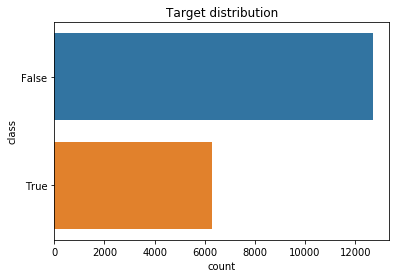

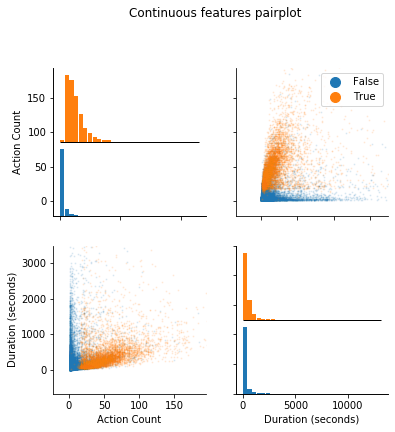

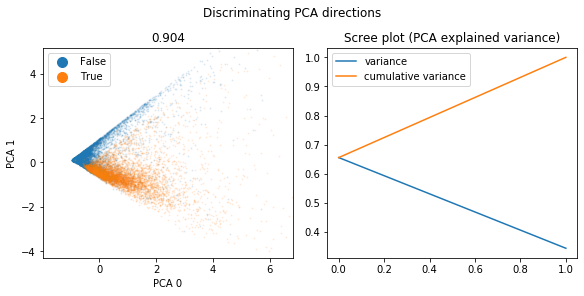

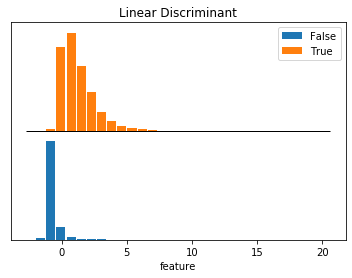

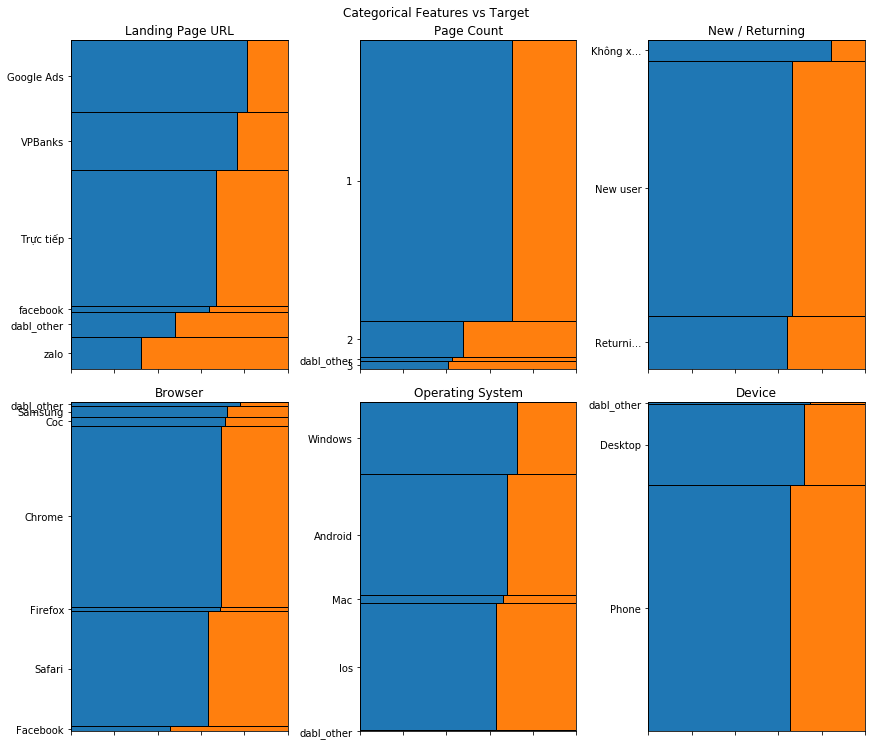

In [9]:
target = 'Favorited'
import dabl
from dabl import plot
plot(eda_da_xem, target)
plt.show()

## Xếp hạng traffic top 5 kênh online

In [10]:
eda_da_xem.groupby('Landing Page URL').count().sort_values(by='Created', ascending=False).head(5)

,Created,Favorited,Exit Page URL,Referrer URL,Action Count,Page Count,Duration (seconds),Rage Clicked,U-Turned,New / Returning,Country,Device,Browser,Operating System
Landing Page URL,,,,,,,,,,,,,,
Trực tiếp,7844,7844,7844,7844,7844,7844,7844,7844,7844,7844,7844,7844,7844,7844
Google Ads,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181
VPBanks,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322
zalo,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889
facebook,390,390,390,390,390,390,390,390,390,390,390,390,390,390


## Số lượng lead thu về trên top 5 kênh

In [11]:
so_dk_moi = eda_da_xem[(eda_da_xem['Favorited']==True)]
so_dk_moi.groupby('Landing Page URL').count().sort_values(by='Created', ascending=False).head(5)

,Created,Favorited,Exit Page URL,Referrer URL,Action Count,Page Count,Duration (seconds),Rage Clicked,U-Turned,New / Returning,Country,Device,Browser,Operating System
Landing Page URL,,,,,,,,,,,,,,
Trực tiếp,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603
zalo,1276,1276,1276,1276,1276,1276,1276,1276,1276,1276,1276,1276,1276,1276
Google Ads,785,785,785,785,785,785,785,785,785,785,785,785,785,785
VPBanks,775,775,775,775,775,775,775,775,775,775,775,775,775,775
facebook,141,141,141,141,141,141,141,141,141,141,141,141,141,141


## Chạy model ML Decision Tree quan sát mức độ ảnh hưởng của Action Count

In [12]:
eda_da_xem['Favorited'] = eda_da_xem['Favorited'].astype(int)

In [13]:
eda_ml = []
eda_ml = pd.DataFrame(eda_ml)
eda_ml['target'] = eda_da_xem['Favorited']
eda_ml['Action Count'] = eda_da_xem['Action Count']
eda_ml['Duration (seconds)'] = eda_da_xem['Duration (seconds)']
eda_ml.groupby('target').count()

,Action Count,Duration (seconds)
target,,
0,12718,12718
1,6304,6304


In [14]:
from  sklearn.model_selection import train_test_split
X = eda_ml.drop('target',axis = 1)
y = eda_ml['target']
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.1, random_state=2)

from sklearn.tree import DecisionTreeClassifier
ket_qua = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
ket_qua.fit(X_trainset,y_trainset)

predLoan = ket_qua.predict(X_testset)
from sklearn.metrics import confusion_matrix,classification_report,precision_score
print(classification_report(y_testset,predLoan))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1287
           1       0.82      0.94      0.87       616

    accuracy                           0.91      1903
   macro avg       0.89      0.92      0.90      1903
weighted avg       0.92      0.91      0.91      1903



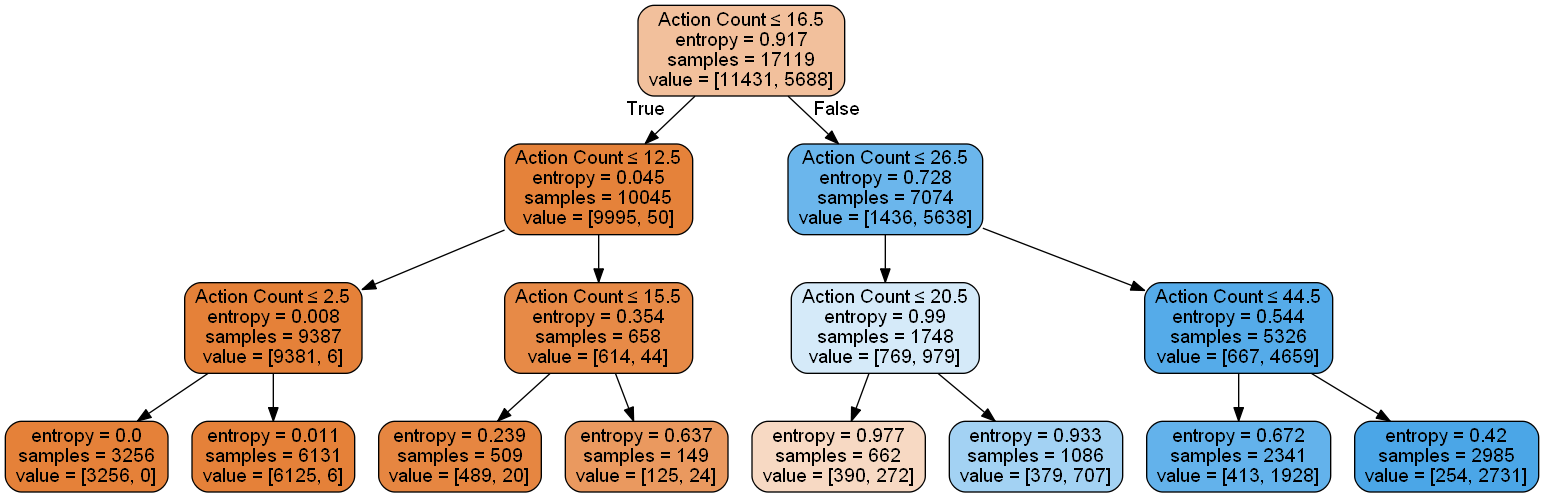

In [15]:
data = eda_ml
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
from sklearn.feature_extraction import DictVectorizer
#--------- Gắn value ------------------
feature_names=[]
for i in range(len(data.columns)):
    i=i+1
    feature_names.append(data.columns[i-1])
feature_names.remove('target')
#---------------------------------------
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(ket_qua,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())